In [1]:
import os
import sys
import inspect
# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn")

In [2]:
import numpy as np
import pandas as pd
from pprint import  pprint
from reporting_functions import get_file_content, get_multiclass_results
from joblib import dump, load

In [3]:
experiments_path = f"{project_home_dir}/experiments"
experiment_filename = "experiment.json"
target_levels = ["classical", "country", "rock", "pop", "hiphop", "jazz", "blues", "disco", "metal", "reggae"]

In [4]:
experiment_id = 110
experiment_config = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_filename}"
)

In [5]:
pprint(experiment_config)

{'ID': 110,
 'data': {'path': '/home/matt/dev/projects/quantum-cnn/data/archive/Data/features_30_sec.csv',
          'sampling': {'random_state': 42, 'test_size': 0.3},
          'target_column': 'label',
          'target_pairs': [],
          'type': '2d'},
 'extra_info': 'main',
 'model': {'classical': {'cnn': {'ignore': True, 'param_grid': {}},
                         'logistic_regression': {'ignore': False,
                                                 'param_grid': {'C': [0.001,
                                                                      0.01,
                                                                      0.1,
                                                                      1.0,
                                                                      10.0,
                                                                      100.0,
                                                                      1000.0],
                                                

In [6]:
path = f"{experiment_config.get('path')}/{experiment_config.get('ID')}"

In [7]:
y_test = pd.read_csv(f"{path}/y_test.csv", index_col=0)

In [8]:
model_names = [filename.split("-confusion-matrix.csv")[0] for filename in os.listdir(path) if "-confusion-matrix.csv" in filename]

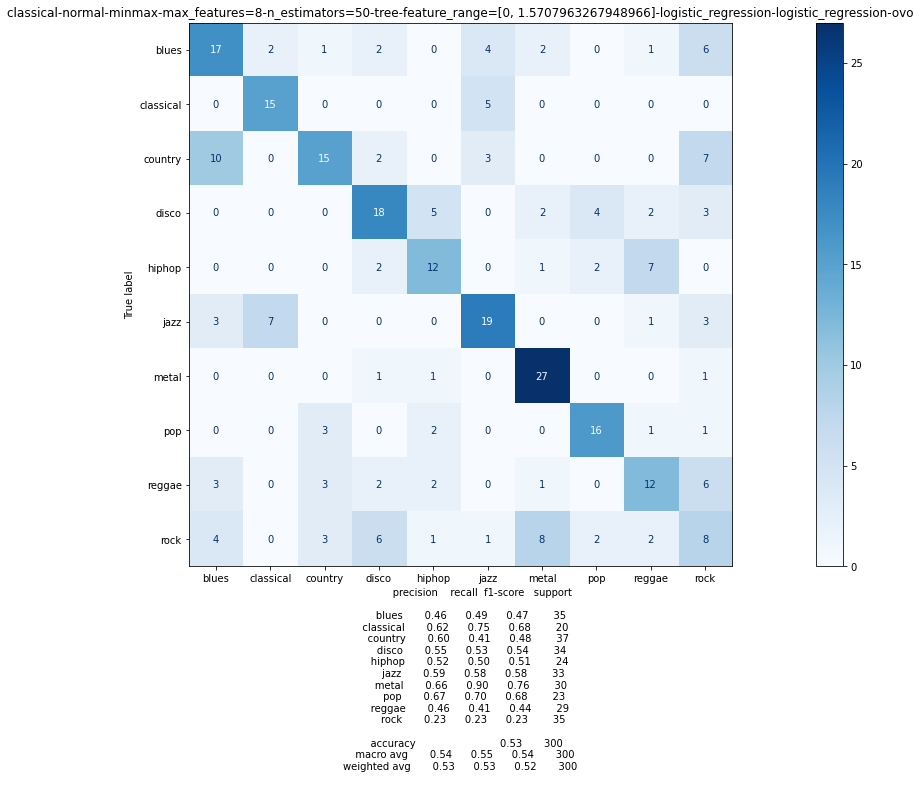

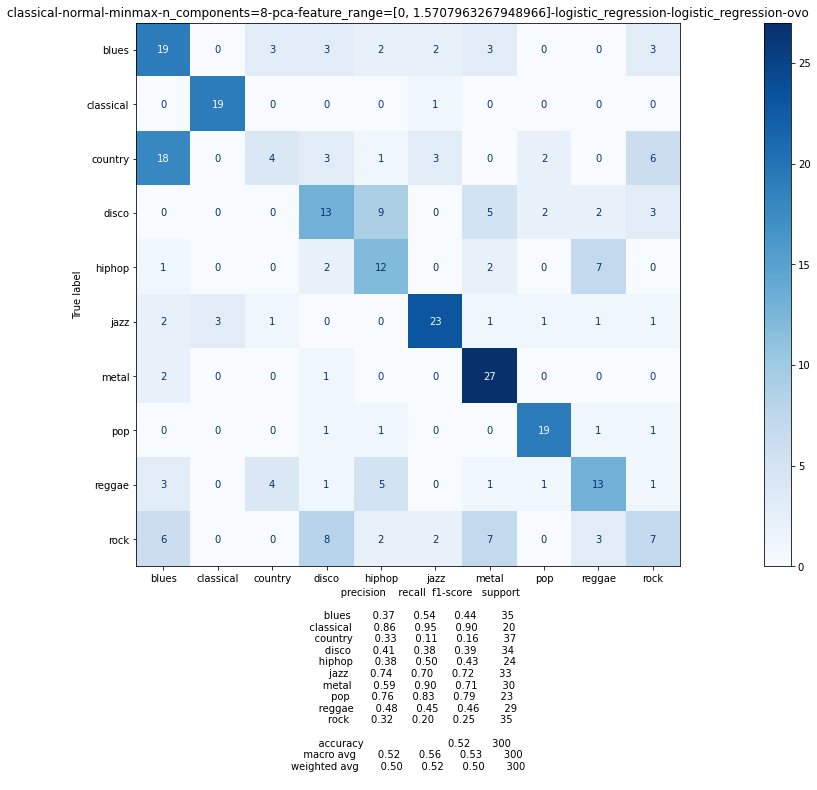

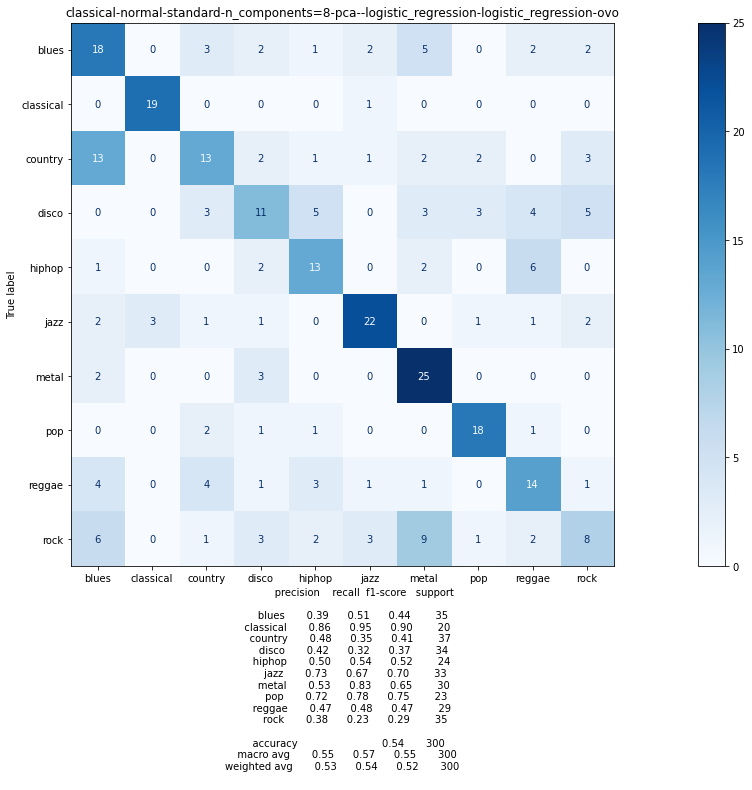

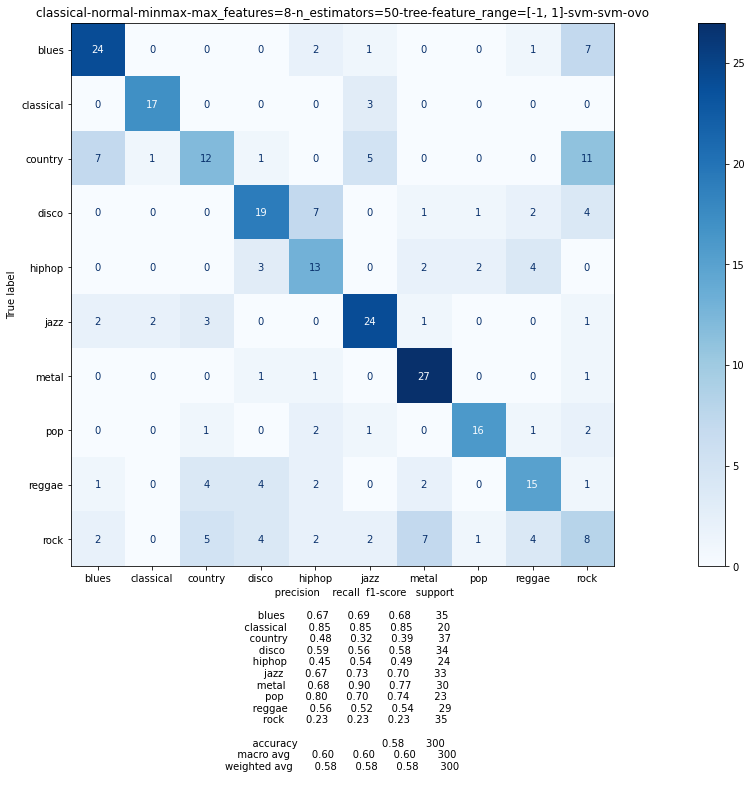

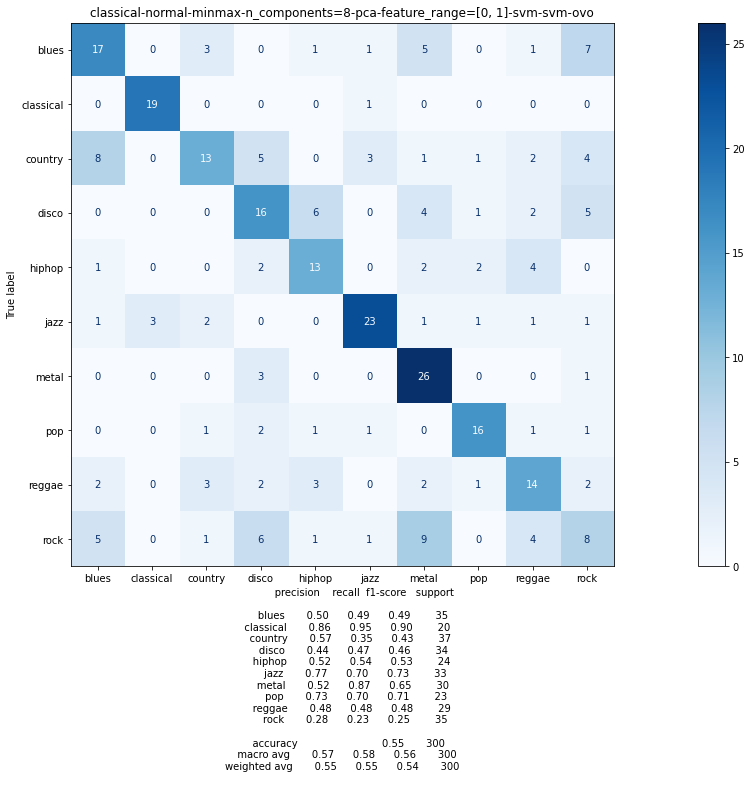

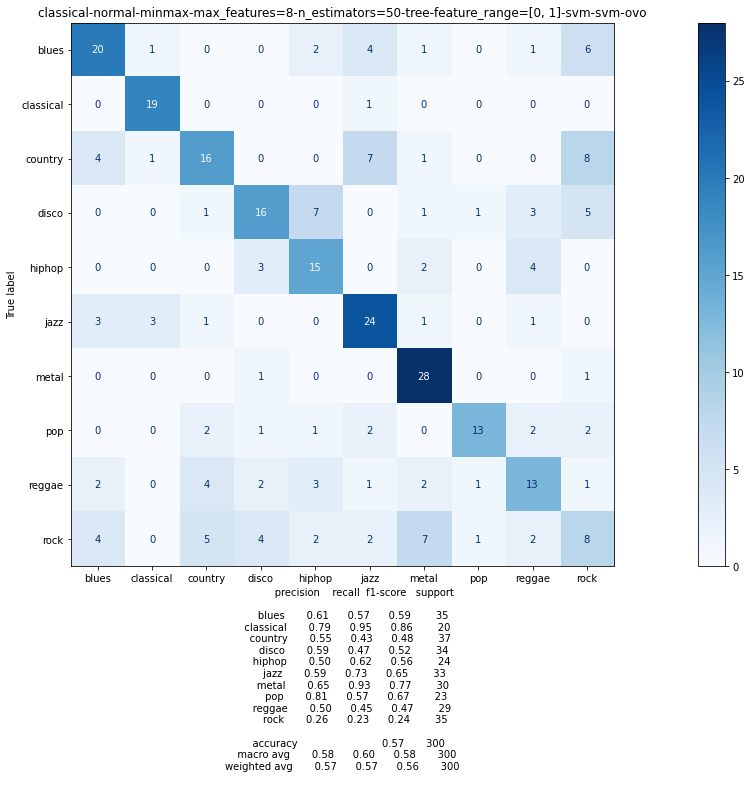

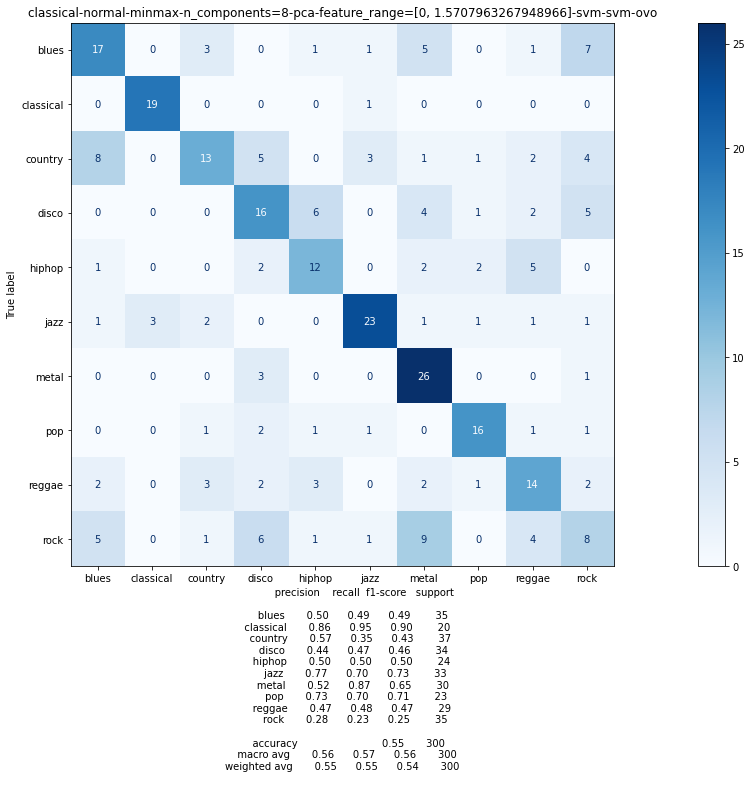

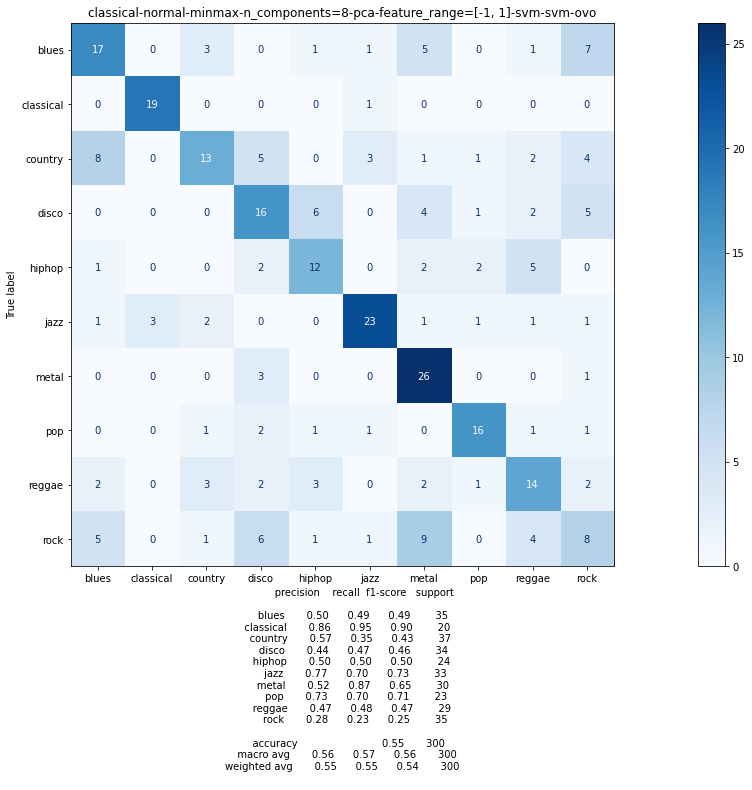

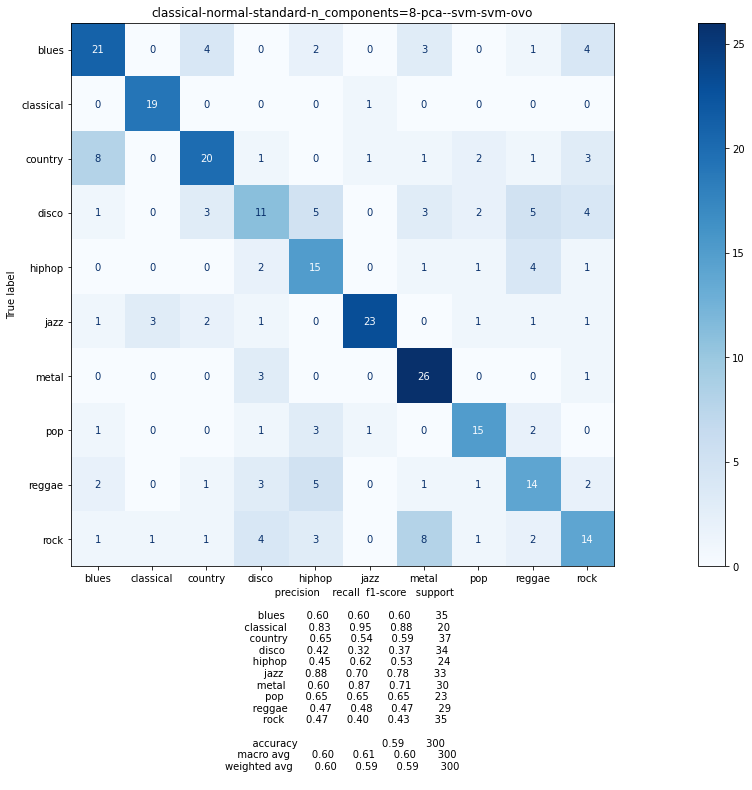

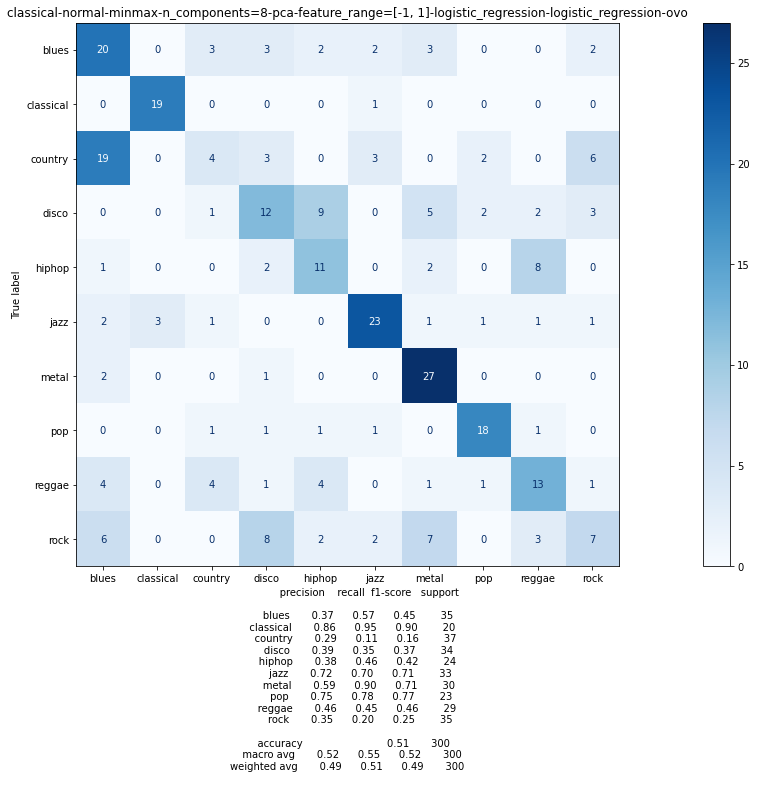

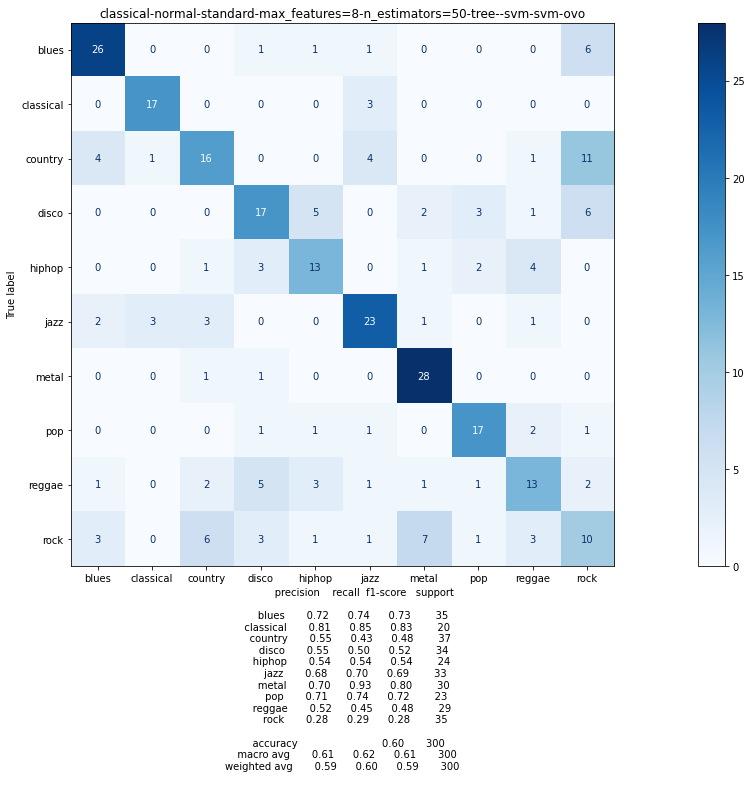

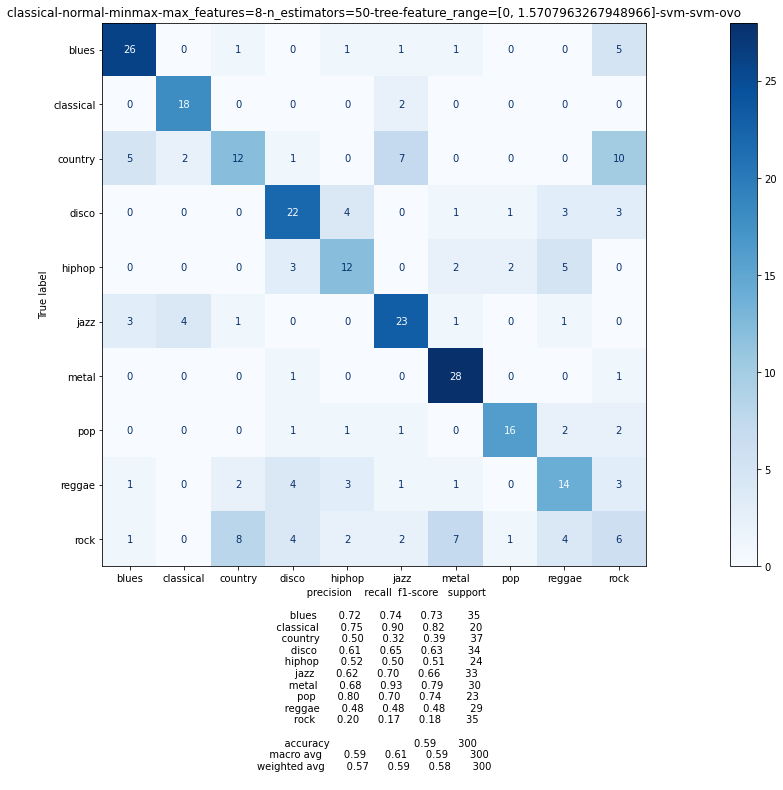

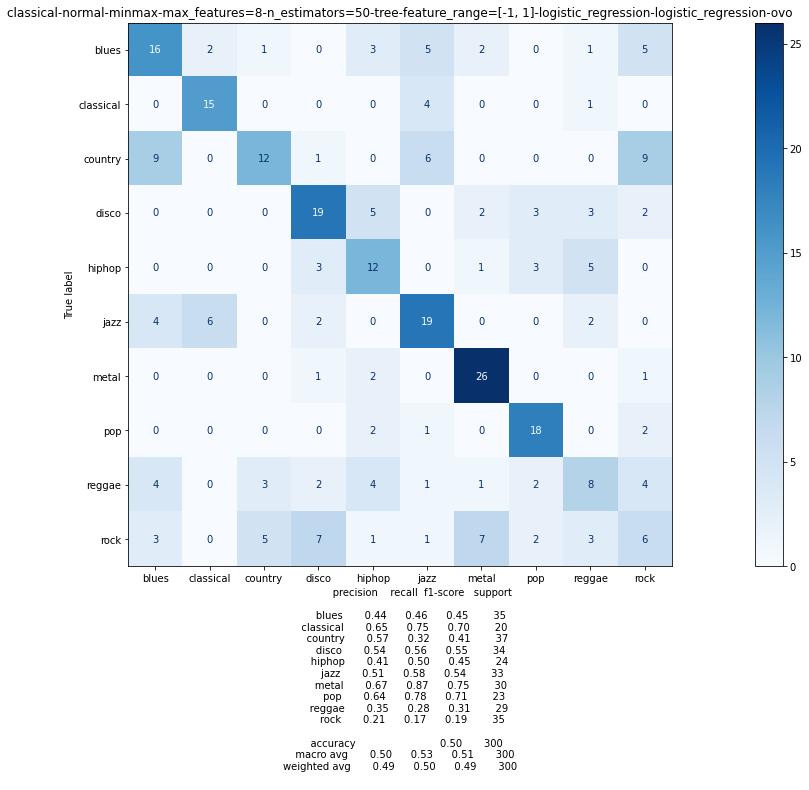

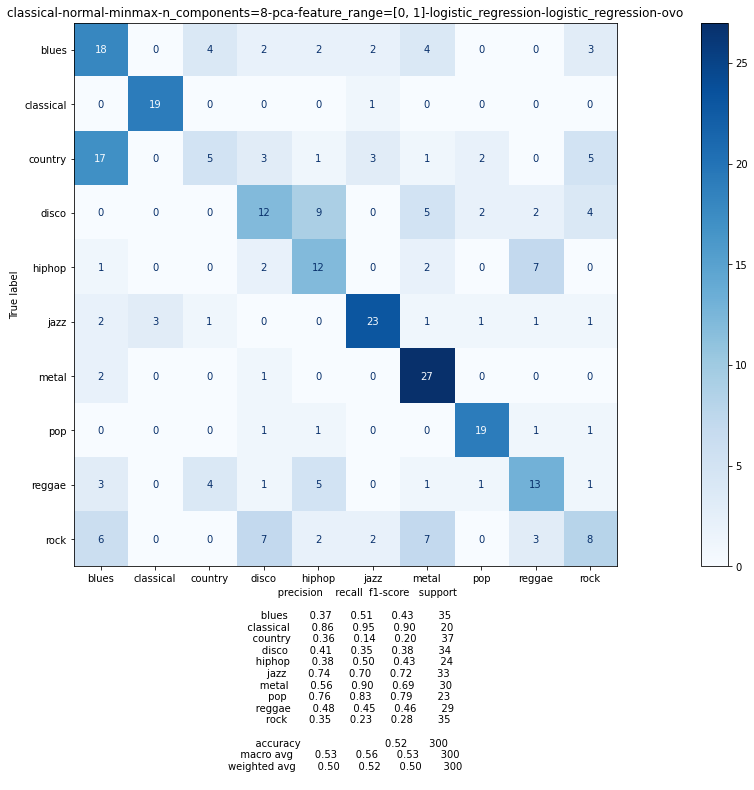

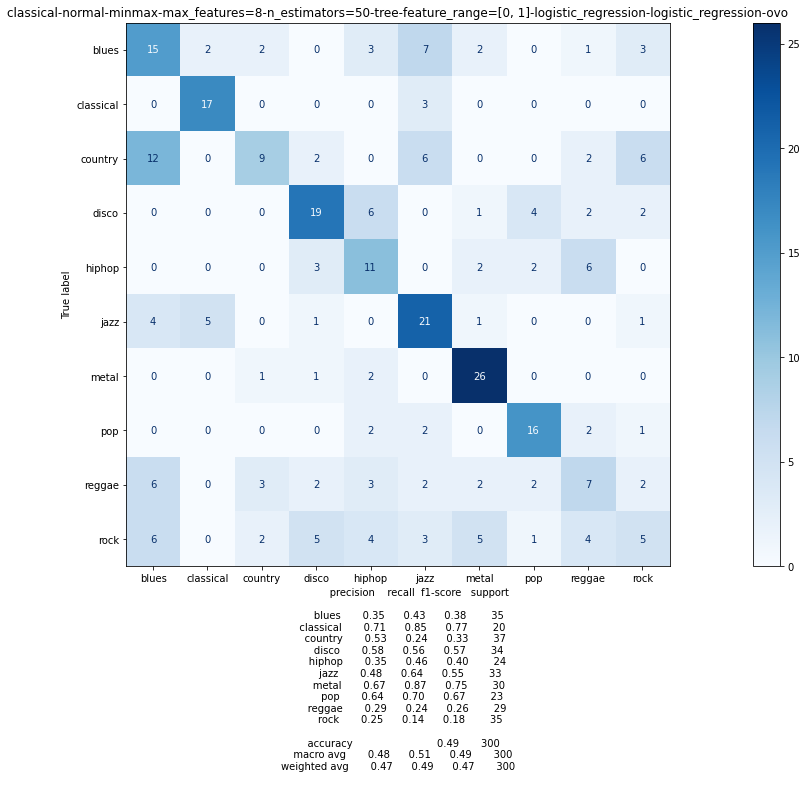

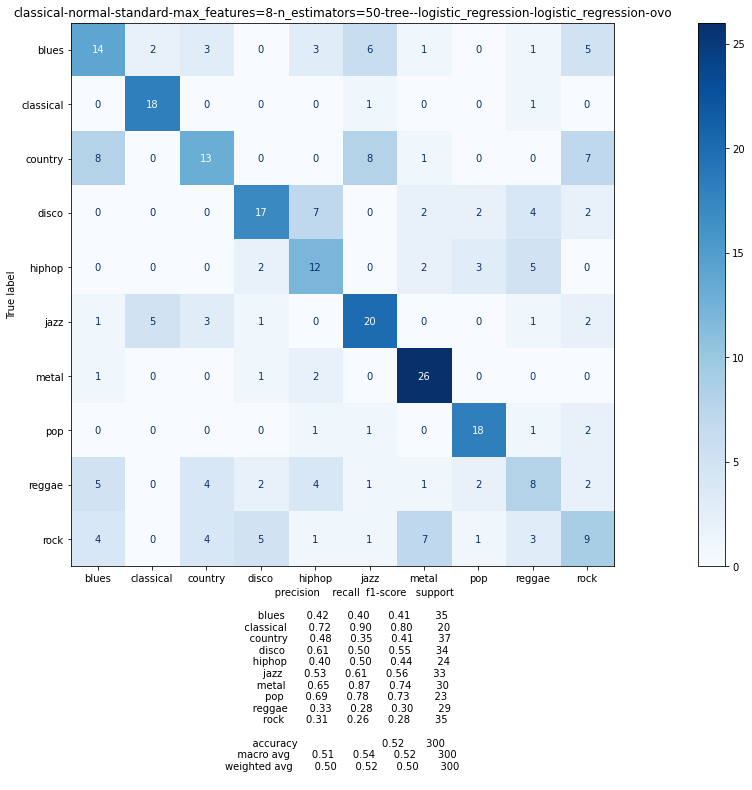

In [10]:
for model_name in model_names:
    y_hat = pd.read_csv(f"{path}/{model_name}-yhat.csv", index_col=0)
    clf = load(f"{path}/{model_name}-clf-grid-results.joblib")
    est = load(f"{path}/{model_name}-estimator.joblib")
    dsp, display_report = get_multiclass_results(y_test, y_hat, model_name=model_name)
    # print(model_name)
    # print(display_report)
    # means = clf.cv_results_["mean_test_score"]
    # stds = clf.cv_results_["std_test_score"]
    # for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    #     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))